<h1 style="font-family:verdana;"> <center>📚 Introduction 📚</center> </h1>

***
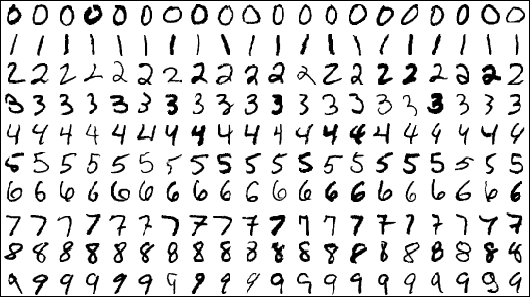
<br>
<br>

<div class="alert alert-block alert-info" style="font-size:15px; font-family:verdana; line-height: 1.4em;">
    <center>
        <span style="color:crimson;">📌Classification of Numbers(MNIST)</span> 
       <br> 
  


<br>
 
In this kernel, we will visualize the MNIST dataset using Matplotlib and Plotly. This is a classic Machine Learning Problem, I will demonstrate how this problem can be approached using PyTorch Library. 
    </center> 
</div>

***

<center><h2>Importing Libraries</h2></center>

In [10]:
import warnings#
warnings.filterwarnings('ignore')#добавть игнорирование на определёные ошибки
import numpy as np#нампай
import pandas as pd#пандас
import cv2#комп вижен

import matplotlib.pyplot as plt#графики
%matplotlib inline
import seaborn as sns#более крутые графики
import plotly.express as px#это обёртка для Plotly.py, которая упрощает процесс создания сложных графиков.
import plotly.graph_objects as go#Эти объекты могут быть использованы для представления фигур. Они имеют некоторые преимущества перед словарями Обеспечивают точную проверку данных.Имеют документацию Python с полной справкой по API.Доступ к свойствам графических объектов можно получить как с помощью поиска по ключу в словаре, так и через точечный вызов.Поддерживают вспомогательные функции более высокого уровня для обновления уже построенных фигур.Конструкторы классов могут принимать аргументы, что делает запись более короткой и читабельной.Поддерживают методы отрисовки (.show()) и экспорта (.write_image()) фигур.
from plotly.subplots import make_subplots#Функция make_subplots используется в Plotly для размещения нескольких графиков на одном окне.


import torch#
import torch.nn as nn#открывает перед пользователем более широкие возможности в плане создания нейронной сети.Например, есть возможность выбрать типы слоев в ней: полносвязные, сверточные (для обработки изображений), рекуррентные и так далее
from torch.utils.data import DataLoader, Dataset# DataLoader — это модуль в PyTorch, который используется для создания мини-пакетов данных.Он позволяет указать размер батча и перемешать данные.
from torch.optim import Adam#Adam (Adaptive Moment Estimation) — это оптимизатор, который используется для обновления весов нейронной сети.Он анализирует исторические градиенты и может корректировать скорость обучения для каждого параметра в реальном времени, что приводит к более быстрой сходимости и лучшей производительности.
from torchvision import transforms#Модуль torchvision.transforms в пакете TorchVision для компьютерного зрения в PyTorch содержит набор общих композитных преобразований изображений и даёт возможность писать новые пользовательские преобразования.
import torch.nn.functional as F#Импорт модуля import torch.nn.functional as F даёт доступ к ряду полезных функций, которые иначе пришлось бы писать самостоятельно.Например, в качестве функции активации можно использовать функцию relu или ступенчатую функцию.

from sklearn.model_selection import train_test_split#train_test_split — это функция в scikit-learn, которая используется для разделения набора данных на наборы для обучения и тестирования

<center><h2>Loading Data</h2></center>

<center> Defining Paths </center>

In [11]:
PATH = '../input/digit-recognizer/'#создаём пути( буквально как путь к файлу)
TRAIN_PATH = PATH + 'train.csv'#
TEST_PATH = PATH + 'test.csv'#

<center>Reading Train & Test csv files</center>

In [12]:
train_df = pd.read_csv(TRAIN_PATH)#считывает и зщаписывает в обьекты
test_df = pd.read_csv(TEST_PATH)#

display(train_df.head())#выводит первые Н столбцов и строк
display(test_df.head())#

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<center><h3>Merging pixel columns & Reshaping to 2D Matrix</h3></center>

Объединение столбцов пикселей и преобразование их в 2D-матрицу

In [13]:
train_pixels = train_df[train_df.columns[1:]].values#набора данных для загрузки и предварительной обработки данных изображений (мы берём исла кроме лейбл и строим матрицу)
test_pixels = test_df[test_df.columns[:]].values#
train_labels = train_df['label'].values#тут сохраняем лейблы
print('Shape of sample data before Reshaping : ',train_pixels[0].shape)#print('Форма образца данных перед преобразованием : ',train_pixels[0].форма)#выводим что у нас вышло


""" Converting vector of shape 784 to matrix of shape 28*28 """#784 числа матрица 28 на 28
train_images = np.array([x.reshape(28,28) for x in train_pixels])#Функция numpy.reshape() в Python используется для изменения формы (размеров) массива без изменения его данных.
test_images = np.array([y.reshape(28,28) for y in test_pixels])#запихиваем в х масив обучения а в у масив теста

print('Shape of sample data after Reshaping : ',np.shape(train_images[0]))#print('Форма выборочных данных после изменения формы : ',np.shape(train_images[0]))


Shape of sample data before Reshaping :  (784,)
Shape of sample data after Reshaping :  (28, 28)


<center><h3>Function to Display Images & Labels</center>

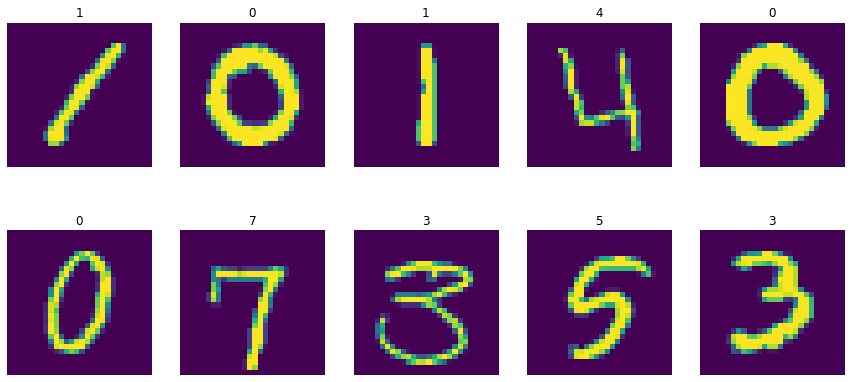

In [14]:
def display_images():#функция рисунка
    rows, col = 2, 5#строк 2 колонок 5
    #rows, col = 2, 2#
    fig = plt.figure(figsize=(15,7))#рисуем фигуру 15 на 7 
    for index in range(10):#выводим первые 10 рисунков
        ax = fig.add_subplot(rows, col, index+1)#
        ax.imshow(train_images[index])#
        ax.set_title(train_labels[index])#сверху пишем индекс
        ax.axis('off')# используется для скрытия осей в графике в Matplotlib.
        
    plt.show()#эдем рисуй!
    
display_images()#

<center><h3>Distribution of Numbers in the Dataset<center>

Распределение чисел в наборе данных

Распределение чисел в наборе данных

In [15]:
px.bar(pd.Series(train_labels).value_counts().reset_index(name='Digit'))#считаем количество цифр всего мньше всего 9 больше всего 0

<center>
We have almost even distribution of all the numbers, <br>the samples are sufficient for Spliting data into Train & Test samples
    У нас почти равномерное распределение всех чисел,
выборок достаточно для разделения данных на обучающие и тестовые выборки

<center><h3> Creating Training & Test Samples
    Создание обучающих и тестовых образцов

In [16]:
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels,test_size=0.2, stratify = train_labels, random_state=101)#перемешивание дата сета но?
print('Distribution of Numbers in Train Sample')#Распределение численности в выборке поездов
print(pd.Series(train_labels).value_counts())#

print("")#
print('Distribution of Numbers in Test Sample')#Распределение чисел в тестовой выборке
print(pd.Series(test_labels).value_counts())#Возвращает серию, содержащую количество уникальных значений.Результирующий объект будет располагаться в порядке убывания, так что первый элемент будет наиболее часто встречающимся элементом.

Distribution of Numbers in Train Sample
1    3747
7    3521
3    3481
9    3350
2    3342
6    3309
0    3306
4    3258
8    3250
5    3036
dtype: int64

Distribution of Numbers in Test Sample
1    937
7    880
3    870
9    838
2    835
6    828
0    826
4    814
8    813
5    759
dtype: int64


<center> We have used stratified Sampling strategy on labels, <br>Numbers are evenly distributed in bot Training and Test samples
    Мы использовали стратегию стратифицированной выборки на этикетках,
номера равномерно распределены в обучающих и тестовых образцах ботов

<center><h3> Creating Datasets(Tensors) for PyTorch</h3></center>
<br>
    <ol>
    <li>We will be transforming our individual input sample before sending for training.
        <ul>
            <li> Normalizing pixels- We have only one Channel(B&W), so we will use normalize Height and Width using (value),(value)
                Incase of RGB(3 channels), our normalizing values would be (r_heig,g_heigh,b_heigh),(r_width,g_width,b_width)
         <li>  To_Tensor - This will convert the images to Tesnor Values and will a new dimension to value. Shape - (1,28,28)     
        </ul>
        <li> Batching - In the Data_loader library we will use batch size of 100 samples to be passed so that the weigths are updated for 100 sample at the same time
            After Batching, the input tensor size would be (100,1,28,28)
            100 is the batch size, 1 is the number of channels(Black & white)
            28*28 is the height and widht of each image
    </ol>
    
    One mental anchor we have when feeding tensors into convolutional is that the first dimension is always batch size (N).
    It’s important to know how PyTorch expects its tensors to be shaped— because you might be perfectly satisfied that your 28 x 28 pixel image shows up as a tensor of torch.Size([28, 28]). 
    Whereas PyTorch on the other hand, thinks you want it to be looking at your 28 batches of 28 feature vectors. 
    
    >>> torch.Size([16, 3, 28, 28])
    # 4d: [batch_size, channels, height, width]
    # use for nn.Conv2d() input.
    
    So, if you wanted to load a grey scale, 28 x 28 pixel image into a Conv2d network layer, 
    find the layer type in the example above. 
    Since it wants a 4d tensor, and you already have a 2d tensor with height and width, just add batch_size, and channels to pad out the extra dimensions, like so: [1, 1, 28, 28].

<center><h3> Создаем наборы данных(тензоры) для PyTorch</h3></center>
<br>
 <ol>
 <li>Мы преобразуем нашу индивидуальную входную выборку перед отправкой на обучение.
 <ул>
 <li> Нормализация пикселей - у нас есть только один канал (черно-белый), поэтому мы будем использовать нормализацию высоты и ширины с помощью (value),(значение)
 В случае RGB (3 канала) нашими нормализующими значениями будут (r_heig,g_heigh,b_heigh),(r_width, g_width,b_width)
 <li> To_Tensor - преобразует изображения в значения Tesnor и добавит новое измерение к значению. Форма - (1,28,28) 
 </ul>
 <li> Пакетная обработка - В библиотеке Data_loader мы будем использовать пакет размером в 100 образцов для передачи, чтобы значения веса обновлялись для 100 образцов одновременно.
 После пакетной обработки размер входного тензора будет равен (100,1,28,28)
 100 - размер пакета, 1 - количество каналов (черно-белых)
 28*28 - высота и ширина каждого изображения
 </ol>
 
 Один ментальный якорь, который у нас есть

Те́нзор (от лат. tensus, «напряженный») — объект линейной алгебры, линейно преобразующий элементы одного линейного пространства в элементы другого. Частными случаями тензоров являются скаляры, векторы, билинейные формы и т. п. Термин «тензор» также часто служит сокращением для термина «тензорное поле», изучением которых занимается тензорное исчисление.
https://www.yandex.ru/video/preview/883453573408520248  
по макту работа не с числыми матрицы а с матрицей как число

In [17]:
class CreateDataset(Dataset):#создание дата сета
    def __init__(self, X, y, transform=None):#
        self.X = X#
        self.y = y#
        self.transform = transform#изменение для большей вариантности
    
    def __len__(self):#
        return len(self.X)#
    
    def __getitem__(self, idx):#
        inp = self.X[idx].astype(np.float32)#?
        out = self.y[idx]#
        
        if self.transform:#
            inp = self.transform(inp)#
        
        return inp,out#

In [18]:
t = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307), (0.3081))])#Нормализация в контексте pytorch вычитает из каждого экземпляра (изображение MNIST в вашем случае) среднее значение (первое число) и делит на стандартное отклонение (второе число). Это происходит для каждого канала отдельно, то есть в mnist вам нужно только 2 числа, потому что изображения имеют оттенки серого, но, скажем, в cifar10, где есть цветные изображения, вы должны использовать что-то вроде строк вашей последней формы (3 числа для среднего значения и 3 для стандартного значения). ).Таким образом, в основном каждое входное изображение в MNIST преобразуется из [0,255] в [0,1], потому что вы преобразуете изображение в Tensor

train_dataset = CreateDataset(train_images, train_labels, transform=t)#
train_loader = DataLoader(train_dataset, shuffle=True , batch_size=100) ## num_workers

test_dataset = CreateDataset(test_images, test_labels, transform=t)#
test_loader = DataLoader(test_dataset, shuffle=True , batch_size=100)#

<center><h3>Creating Network</center>

In [19]:
class Net(nn.Module):#??
    def __init__(self, num_classes=10):#
        super(Net, self).__init__()
        # Inchannel = 1 для черно-белых изображений, 3 для RGB, мы выбираем out_channels
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3) #
        # Канал Out сверху используется так же, как канал in в слое below conv
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3)#
        
        self.pool = nn.MaxPool2d(2,2)#
        self.relu = nn.ReLU()#
        
        self.fc1 = nn.Linear(1600, 100)#
        self.fc2 = nn.Linear(100, 10)#
        #self.drop = nn.Dropout2d()#
        #self.softmax = nn.Softmax(dim=1)#
        
    def forward(self, x):#
        x = self.relu(self.pool(self.conv1(x)))#
        x = self.relu(self.pool(self.conv2(x)))#
        
        x = x.view(100,-1)#
        x = self.relu(self.fc1(x))#
        #x = self.drop(x)#
        x = self.fc2(x)#
        return F.log_softmax(x)#
                

    Use view() to change your tensor’s dimensions.
    image = image.view(batch_size, -1)
    You supply your batch_size as the first number, and then “-1” basically tells Pytorch, 
    “you figure out this other number for me… please.” 
    Your tensor will now feed properly into any linear layer

softmax:
exp(x_i) / exp(x).sum()

log_softmax:
log( exp(x_i) / exp(x).sum() )

Используйте функцию view(), чтобы изменить размеры вашего тензора.
image = image.view(batch_size, -1)
Вы указываете свой batch_size в качестве первого числа, а затем “-1”, по сути, говорит Pytorch:
“Ты вычисляешь это другое число для меня… пожалуйста.” 
Теперь ваш тензор будет корректно отображаться в любом линейном слое
softmax: exp(x_i) / exp(x).sum()

log_softmax: журнал(exp(x_i) / exp(x).сумма() )

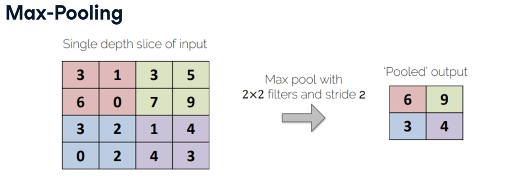

<center> <h3> Some Parameters, loss, optimizer Некоторые параметры, потери, оптимизатор

In [20]:
EPOCHS = 15#
net = Net()#
criterion = nn.CrossEntropyLoss()#
optimizer = Adam(net.parameters(), lr=0.001)#        

ЭПОХИ = 15#
сеть = Net()#
критерий = nn.CrossEntropyLoss()#
оптимизатор = Adam(сеть.параметры(), lr=0,001)#

<center><h3> Training Model

In [21]:
for epoch in range(EPOCHS):#пока эпохи не закончились
    net.train()#
    for data in train_loader:#для получения данных в загрузчике 
        # Get inputs#
        X_train, y_train = data#
        # Обнулите градиенты параметров
        optimizer.zero_grad()#
        
        #Forward + backward + optimizeВперед + назад + оптимизировать
        y_pred = net(X_train)#
        y_pred = y_pred.squeeze(0)#

        train_loss = criterion(y_pred, y_train)#
        train_loss.backward()#
        optimizer.step()#
    print(f"Epoch :{epoch+1}, Train Loss = {train_loss.item()}")#

Epoch :1, Train Loss = 0.02402457222342491
Epoch :2, Train Loss = 0.05230482667684555
Epoch :3, Train Loss = 0.0329829566180706
Epoch :4, Train Loss = 0.014491576701402664
Epoch :5, Train Loss = 0.03631317988038063
Epoch :6, Train Loss = 0.03083828277885914
Epoch :7, Train Loss = 0.0628102719783783
Epoch :8, Train Loss = 0.015651896595954895
Epoch :9, Train Loss = 0.011281329207122326
Epoch :10, Train Loss = 0.003370743477717042
Epoch :11, Train Loss = 0.04529869928956032
Epoch :12, Train Loss = 0.10741914808750153
Epoch :13, Train Loss = 0.0008012033067643642
Epoch :14, Train Loss = 0.04846832901239395
Epoch :15, Train Loss = 0.09322098642587662


Ваши нейронные сети могут выполнять множество различных задач. Будь то классификация данных, например, группировка изображений животных по кошкам и собакам, задачи регрессии, например прогнозирование ежемесячных доходов, или что-то еще. Каждая задача имеет разные выходные данные и требует разного типа функции потерь.

То, как вы настраиваете функции потерь, может улучшить или ухудшить производительность вашего алгоритма. Правильно настроив функцию потерь , вы можете быть уверены, что ваша модель будет работать так, как вы хотите.

К счастью для нас, есть функции потерь, которые мы можем использовать, чтобы максимально эффективно решать задачи машинного обучения. 

В этой статье мы поговорим о популярных функциях потерь в PyTorch и о создании пользовательских функций потерь. Закончив чтение, вы должны знать, какой из них выбрать для своего проекта. 
Каковы функции потерь?
Прежде чем мы перейдем к особенностям PyTorch, давайте освежим память о том, что такое функции потерь. 

Функции потерь используются для измерения ошибки между выходными данными прогноза и предоставленным целевым значением. Функция потерь говорит нам, насколько далека модель алгоритма от реализации ожидаемого результата. Слово «потеря» означает штраф, который получает модель за неспособность дать желаемые результаты.

Например, функция потерь (назовем ее J ) может принимать следующие два параметра:

Прогнозируемый результат ( y_pred )
Целевое значение ( у )

КОРОЧЕ ЭТО О НАСКОЛЬКО НЕЙРОНКА ПРОМОХНУЛАСТЬ ОТ ЦЕЛЕВОГО РЕЗУЛЬТАТА


<center> <h3>Evaluation

In [22]:
correct, total = 0, 0#правильно и то что по факту

pred_probabs = []#
pred_y = []#
test_y = []#
test_x = []#тестируеим
net.eval()#

for data in test_loader:#
    X_test, y_test = data#
    output = net(X_test)#
    _, predicted = torch.max(output.data,1)# макс результат принимать за основной
    total += y_test.size(0)#
    correct += (predicted == y_test).sum().item()#если резултат совпадает с нужным то +1
    
    pred_probabs.append(output)#
    test_x.append(X_test)#
    pred_y.append(predicted)#
    test_y.append(y_test)#

print('Test Accuracy : ',100*correct/total)#процент успеха


Test Accuracy :  98.19047619047619


<center><h3> Converting Tensor(GPU) data into Numpy Arrays Преобразование тензорных данных (GPU) в числовые массивы

In [23]:
pred_y = np.array([x.cpu().detach().numpy() for x in pred_y])#?

test_y = np.array([x.cpu().detach().numpy() for x in test_y])#?

test_x = np.array([x.cpu().detach().numpy() for x in test_x])#?

pred_probabs = np.array([x.cpu().detach().numpy() for x in pred_probabs])#Изменение формы массивов в том виде, в каком они представлены в пакетном формате


'''Reshaping the arrays as they are present in batch format'''
pred_y = pred_y.reshape(-1)#линейная регресия
test_y = test_y.reshape(-1)#но для чего?
test_x = test_x.reshape(8400,28,28)#
pred_probabs = pred_probabs.reshape(8400,10)#

    x.cpu() will do nothing at all if your Tensor is 
    already on the cpu and otherwise create a new Tensor on the cpu with the same content as x.

    y = x.detach() breaks the graph between x and y. 
    But y will actually be a view into x and share memory with it.

x.cpu() вообще ничего не сделает, если ваш тензор
уже находится в cpu, и в противном случае создаст новый тензор в cpu с тем же содержимым, что и x.

y = x.detach() разрывает график между x и y. 
Но y на самом деле будет видом на x и будет совместно использовать с ним память.

In [24]:
pred_df = pd.DataFrame(zip(pred_y, test_y), columns=['Test','Pred'])#

<center><h3> Plotting Predicted outputs Построение графиков прогнозируемых результатов

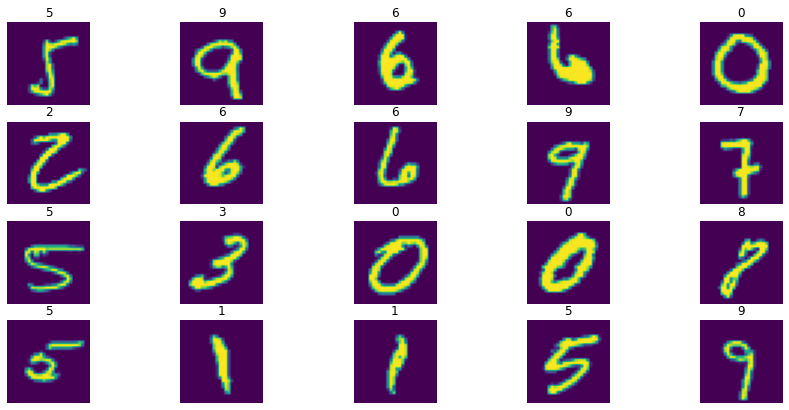

In [25]:
def display_images():#
    rows, col = 4, 5#
    #rows, col = 2, 2#
    fig = plt.figure(figsize=(15,7))#
    for index in range(20):#
        ax = fig.add_subplot(rows, col, index+1)#
        ax.imshow(test_x[index])#
        ax.set_title(pred_y[index])#
        ax.axis('off')#
        
    plt.show()
    
display_images()

<center> <h3>Test Labels vs Predicted Labels Тестовые метки в сравнении с прогнозируемыми метками

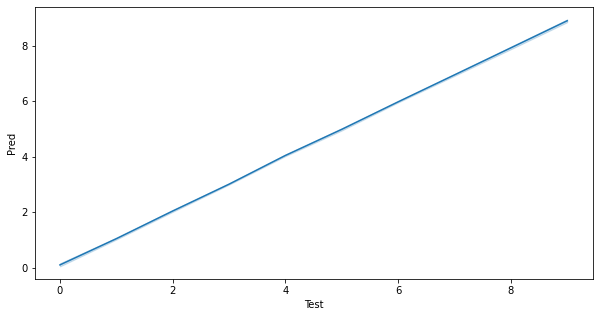

In [26]:
_ = plt.figure(figsize=(10,5))#
_ = sns.lineplot(data=pred_df, x='Test', y='Pred')#

The accuracy (98%) is so high that the test and pred labels form a straight line at 45 degrees
Точность (98%) настолько высока, что метки test и pred образуют прямую линию под углом 45 градусов

<center><h3> Samples that were predicted wrongly
    Образцы, которые были неправильно предсказаны

In [27]:
pred_df[pred_df['Test'] != pred_df['Pred']]# выводит 2 строки что по акту и праильный ответ

,Test,Pred
131,5,3
164,4,9
298,8,6
342,5,8
381,6,8
...,...,...
8128,3,5
8327,0,2
8330,9,7
8344,5,3


<center><h3> Distribution of Numbers that were predicted wrong
    </h3></center>
   <center> Number VS Count of wrong predictions
    Распределение чисел, которые были предсказаны неверно
 </h3></center>
 <center> Соотношение числа и количества неверных прогнозов

In [28]:
df = pd.DataFrame(pred_df[pred_df['Test'] != pred_df['Pred']]['Test'].value_counts().reset_index())#
df.columns = ['Number','Wrong Prediction Count']#
display(df)#
px.bar(pred_df[pred_df['Test'] != pred_df['Pred']]['Test'].value_counts())#строит график где лхонулся под каком чеслом более множество ошибок

,Number,Wrong Prediction Count
0,5,31
1,9,21
2,7,18
3,8,17
4,2,15
5,6,12
6,0,12
7,1,10
8,4,9
9,3,7


<center><h3> Predicted Softmax Probabilities Предсказанные вероятности Softmax

In [29]:
# Output Probabilities of First Four samples
# Exp is used as the pred_prob was an output of log_softmax, 
# hence reversing/ using anti log 
# Выводим вероятности первых четырех выборок
# Exp используется, поскольку pred_prob был результатом log_softmax, 
# следовательно, отменяем / используем anti log
np.round(np.exp(pred_probabs[:4]), decimals=4)#

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

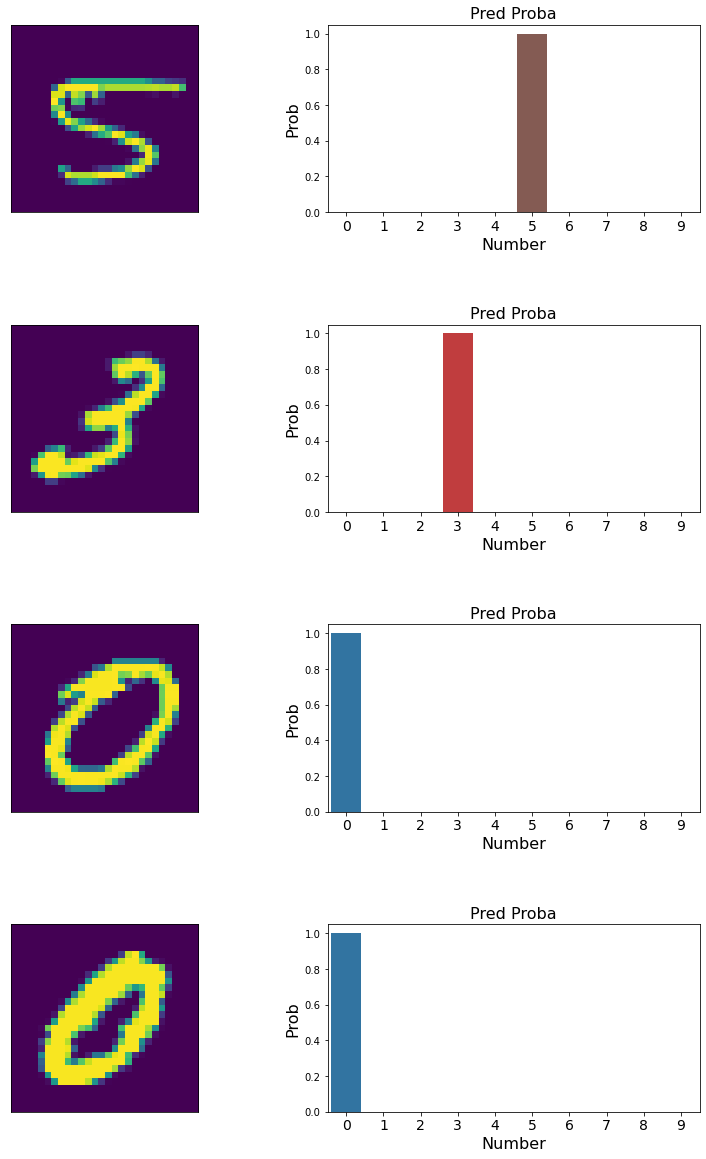

In [30]:
plt.figure(figsize=(14,20))# строит график из столбцов где с какой вероятностью цифарка 


for i in range(4):#
    plt.subplot(4,2,2*i+1)#
    plt.imshow(test_x[i+10])#
    plt.title("") #
    plt.xlabel("") #
    plt.ylabel("") #
    plt.xticks([]) #
    plt.yticks([])#

    plt.subplot(4,2,2*i+2)#
    sns.barplot(x=[0,1,2,3,4,5,6,7,8,9],y=np.round(np.exp(pred_probabs[i+10]), decimals=4))# 
    plt.title("Pred Proba", fontsize=16) #
    plt.xlabel("Number", fontsize=16) #
    plt.ylabel("Prob", fontsize=16) #
    plt.xticks(fontsize=14)#

plt.subplots_adjust(hspace = 0.6, wspace = 0.1)#

plt.show()#

The Probabilities of above samples are one, which means that our model was not confused even a littled for above samples